# Visualize
Notebook for visualizing gcode commands.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from amdt import EagarTsai, Simulator
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm
from pprint import pprint

In [2]:
s = Simulator()
gcode_commands = s.load_gcode_commands("3DBenchy.gcode")

100%|██████████| 86539/86539 [00:05<00:00, 16010.35it/s]


In [3]:
print(s.gcode_layer_change_indexes)

[0, 1, 1399, 1925, 2324, 2846, 3114, 3391, 3659, 3937, 4226, 4526, 4830, 5068, 5349, 5642, 5936, 6283, 6644, 7021, 7420, 8014, 8660, 9295, 9894, 10471, 11024, 11731, 12409, 13133, 13869, 14636, 15480, 16339, 17253, 18184, 19119, 20067, 20934, 21793, 22640, 23516, 24379, 25218, 26000, 26748, 27504, 28225, 29012, 29907, 30741, 31695, 32569, 33505, 34148, 34805, 35487, 36166, 36845, 37508, 38189, 38823, 39485, 40199, 40874, 41506, 42160, 42806, 43404, 44016, 44544, 45064, 45570, 46110, 46639, 47148, 47673, 48251, 48828, 49355, 49845, 50326, 50805, 51271, 51698, 52109, 52511, 52883, 53253, 53598, 53900, 54170, 54428, 54673, 54917, 55161, 55406, 55656, 55904, 56153, 56402, 56673, 56979, 57285, 57591, 57905, 58232, 58569, 58862, 59108, 59347, 59587, 59832, 59974, 60117, 60278, 60447, 60605, 60773, 61067, 61407, 61755, 62130, 62522, 62714, 63087, 63453, 63792, 64219, 64625, 65065, 65509, 65844, 66163, 66403, 66544, 66638, 66732, 66828, 66924, 67020, 67116, 67212, 67340, 67469, 67599, 67727, 6

In [4]:
LAYER_INDEX = 10
START_INDEX = 0
END_INDEX = -1

In [5]:
print(gcode_commands[0])

{'X': 0.0, 'Y': 0.0, 'Z': 5.0, 'E': 0.0}


In [6]:
gcode_layer_commands = s.get_gcode_commands_by_layer_change_index(LAYER_INDEX)
pprint(gcode_layer_commands)

[{'E': 0.0, 'X': 93.946, 'Y': 91.817, 'Z': 3.05},
 {'E': 5.31006, 'X': 93.946, 'Y': 91.817, 'Z': 3.05},
 {'E': 0.0, 'X': 73.95, 'Y': 93.25, 'Z': 3.05},
 {'E': 2.0, 'X': 73.95, 'Y': 93.25, 'Z': 3.05},
 {'E': 0.0, 'X': 73.95, 'Y': 93.25, 'Z': 3.05},
 {'E': 2.01438, 'X': 74.146, 'Y': 93.024, 'Z': 3.05},
 {'E': 2.0347, 'X': 74.546, 'Y': 92.89, 'Z': 3.05},
 {'E': 3.19664, 'X': 98.627, 'Y': 90.946, 'Z': 3.05},
 {'E': 3.22928, 'X': 99.304, 'Y': 90.909, 'Z': 3.05},
 {'E': 3.26463, 'X': 100.039, 'Y': 90.896, 'Z': 3.05},
 {'E': 3.31734, 'X': 101.134, 'Y': 90.934, 'Z': 3.05},
 {'E': 3.37271, 'X': 102.28, 'Y': 91.045, 'Z': 3.05},
 {'E': 3.43097, 'X': 103.476, 'Y': 91.24, 'Z': 3.05},
 {'E': 3.48538, 'X': 104.578, 'Y': 91.495, 'Z': 3.05},
 {'E': 3.53945, 'X': 105.656, 'Y': 91.815, 'Z': 3.05},
 {'E': 3.59312, 'X': 106.703, 'Y': 92.199, 'Z': 3.05},
 {'E': 3.6511, 'X': 107.806, 'Y': 92.686, 'Z': 3.05},
 {'E': 3.70765, 'X': 108.848, 'Y': 93.231, 'Z': 3.05},
 {'E': 3.75728, 'X': 109.731, 'Y': 93.764, 'Z'

In [7]:
gcode_segments = s.gcode_commands_to_segments(gcode_layer_commands)
pprint(gcode_segments)

100%|██████████| 298/298 [00:00<00:00, 113318.46it/s]


[{'E': [0.0, 5.31006],
  'X': [93.946, 93.946],
  'Y': [91.817, 91.817],
  'Z': [3.05, 3.05],
  'angle_xy': 0.0,
  'distance_xy': 0.0,
  'travel': False},
 {'E': [5.31006, 0.0],
  'X': [93.946, 73.95],
  'Y': [91.817, 93.25],
  'Z': [3.05, 3.05],
  'angle_xy': 3.0700506280593474,
  'distance_xy': 20.047281735936167,
  'travel': True},
 {'E': [0.0, 2.0],
  'X': [73.95, 73.95],
  'Y': [93.25, 93.25],
  'Z': [3.05, 3.05],
  'angle_xy': 0.0,
  'distance_xy': 0.0,
  'travel': False},
 {'E': [2.0, 0.0],
  'X': [73.95, 73.95],
  'Y': [93.25, 93.25],
  'Z': [3.05, 3.05],
  'angle_xy': 0.0,
  'distance_xy': 0.0,
  'travel': True},
 {'E': [0.0, 2.01438],
  'X': [73.95, 74.146],
  'Y': [93.25, 93.024],
  'Z': [3.05, 3.05],
  'angle_xy': -0.8563688144534776,
  'distance_xy': 0.29915213520882444,
  'travel': False},
 {'E': [2.01438, 2.0347],
  'X': [74.146, 74.546],
  'Y': [93.024, 92.89],
  'Z': [3.05, 3.05],
  'angle_xy': -0.3232498036481386,
  'distance_xy': 0.4218483139707976,
  'travel': False

In [8]:
first_location = [gcode_segments[0]["X"][0]/1000, gcode_segments[0]["Y"][0]/1000]
print(first_location)

[0.093946, 0.091817]


{'beam_diameter': 5e-05, 'power': 200.0, 'velocity': 0.8, 't_0': 300.0}


100%|█████████▉| 297/298 [05:23<00:01,  1.17s/it]

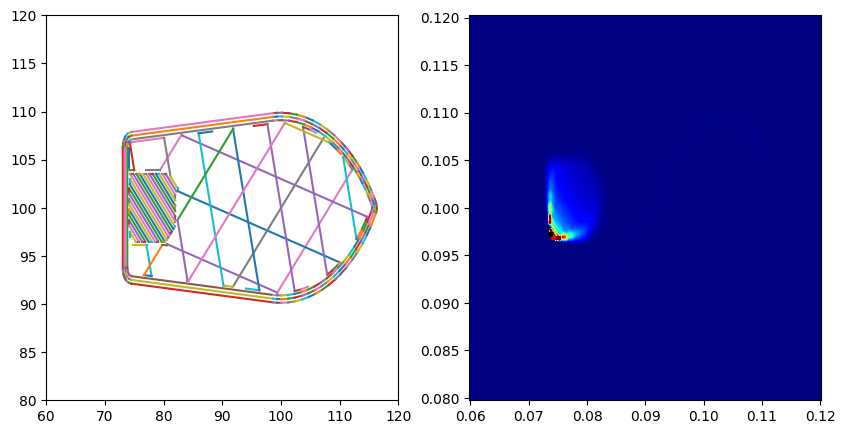

In [9]:
mesh = {
    "b_c": "temp",
    "x_location": first_location[0],
    "y_location": first_location[1],
    "x_min": 0.06,
    "x_max": 0.12,
    "y_min": 0.08,
    "y_max": 0.12,
    "z_min": -800e-6,
    "z_max": 0,
    "x_start_pad": 200e-6, 
    "y_start_pad": 200e-6,
    "x_end_pad": 200e-6, 
    "y_end_pad": 200e-6,
}

et = EagarTsai(mesh=mesh)

velocity = 800 # mm/s

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(index):

    line = gcode_segments[index]

    dt = line["distance_xy"] / velocity
    power = 200

    if not line["travel"]:
        ax[0].set_xlim(60, 120)
        ax[0].set_ylim(80, 120)
        x = [line["X"][0], line["X"][1]]
        y = [line["Y"][0], line["Y"][1]]
        ax[0].plot(x, y)
    
    else:
        power = 0

    if dt > 0:
        # print(f"dt {dt}")
        et.forward(dt, line["angle_xy"], power)

        # print(et.theta)

        ax[1].clear()
        ax[1].pcolormesh(et.xs, et.ys, et.theta[:, :, -1].T, cmap = 'jet', vmin = 300, vmax = 1923)
        ax[1].plot(et.location[0], et.location[1] ,'r.')
        ax[1].plot(et.xs[et.location_idx[0]], et.ys[et.location_idx[1]], 'k.')

animate = FuncAnimation(fig, update, frames=tqdm(range(len(gcode_segments))))

animate.save(f"eagar_tsai_layer_index_{LAYER_INDEX}.gif", writer=PillowWriter(fps=20))
